In [51]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline
from termcolor import colored
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
import time
import datetime
import operator
import warnings
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
# Make Plotly work in Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [52]:
country_wise = pd.read_csv('country_wise_latest.csv')
print("Country Wise Data shape =",country_wise.shape)
country_wise.head(10)

Country Wise Data shape = (187, 15)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [53]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

### Histogram plot

#### Visualizing the total deaths from all the countries

Deaths for first 50 countries

In [54]:
import plotly.graph_objects as go


# Display death due to covid data for various countries 
fig = px.bar(country_wise.head(50), y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')

# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)

# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)

fig

Deaths from next 50 countries

In [55]:
fig1 = px.bar(country_wise[50:101], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')

# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)

# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)

fig1

Deaths for next 50 countries

In [56]:
fig1 = px.bar(country_wise[101:151], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')

# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)

# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)

fig1

Deaths from next 50 countries

In [57]:
fig1 = px.bar(country_wise[151:], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')

# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)

# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)

fig1

##### Pie-Chart Representation of total cases in all the coutries of Asia continent

In [58]:
worldometer = pd.read_csv('worldometer_data.csv')
worldometer_asia = worldometer[worldometer['Continent'] == 'Asia']


px.pie(worldometer_asia, values='TotalCases', names='Country/Region', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)

#### Below showing the animated transition of Confirmed cases from 22 Jan 2020 to July 2020

In [59]:
full_grouped = pd.read_csv('full_grouped.csv')

india = full_grouped[full_grouped['Country/Region'] == 'India']
us = full_grouped[full_grouped['Country/Region'] == 'US']
russia = full_grouped[full_grouped['Country/Region'] == 'Russia']
china = full_grouped[full_grouped['Country/Region'] == 'China']
df = pd.concat([india,us,russia,china], axis=0)

# Watch as bars chart covid cases changes


fig = px.bar(df, x="Country/Region", y="Confirmed", color="Country/Region",
  animation_frame="Date", animation_group="Country/Region", range_y=[0,df['Confirmed'].max() + 100000])

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1

fig

#### Below we have plotted a hist plot of death across countries of Asian continent.

In [60]:
fig = px.histogram(worldometer_asia,x = 'TotalDeaths', nbins=20, 
                   labels={'value':'Total Deaths'},title='Death Distribution of Asia Continent', 
                   marginal='violin',
                   color='Country/Region')

fig.update_layout(
    xaxis_title_text='Total Deaths', showlegend=True
)

#### Showing a Globe map which dislays the deaths of all countries

In [61]:
import pycountry

worldometer['Country/Region'].replace('USA','United States', inplace=True)
worldometer['Country/Region'].replace('UAE','United Arab Emirates', inplace=True)
worldometer['Country/Region'].replace('Ivory Coast','Côte d\'Ivoire', inplace=True)
worldometer['Country/Region'].replace('S. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('N. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('DRC','Republic of the Congo', inplace=True)
worldometer['Country/Region'].replace('Channel Islands','Jersey', inplace=True)

exceptions = []

def get_alpha_3_code(cou):
    try:
        return pycountry.countries.search_fuzzy(cou)[0].alpha_3
    except:
        exceptions.append(cou)


worldometer['iso_alpha'] = worldometer['Country/Region'].apply(lambda x : get_alpha_3_code(x))

# removeing exceptions
for exc in exceptions:
    worldometer = worldometer[worldometer['Country/Region']!=exc]
    
    
fig = px.scatter_geo(worldometer, locations="iso_alpha",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Country/Region", # column added to hover information
                     size="TotalCases", # size of markers
                     projection="orthographic")
fig

## Prediction

We are using XG Boost algorithm, SVM and Polynomial Regression for prediction of covid cases

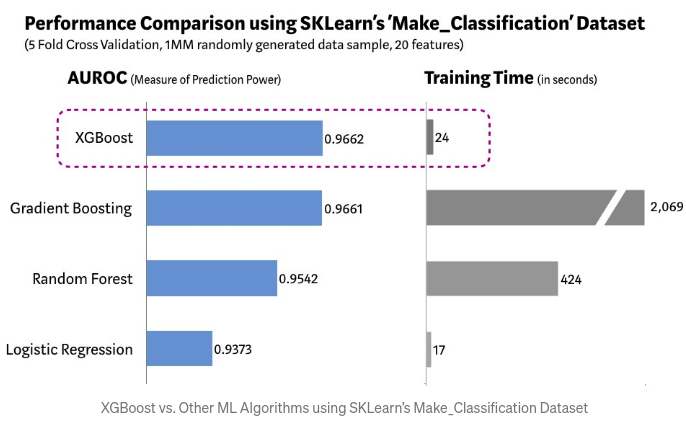


In [62]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [63]:
conf_case = pd.read_csv('time_series_covid_19_confirmed.csv')
us_medical_data = pd.read_csv('usa_county_wise.csv')
lat_case = pd.read_csv('country_wise_latest.csv')
death_case = pd.read_csv('time_series_covid_19_deaths_US.csv')
recoveries_case=pd.read_csv('time_series_covid_19_recovered.csv')

In [64]:
conf_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [65]:
lat_case.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [66]:
us_medical_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [67]:
death_case.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,109,109,110,110,110,110,110,110,110,110
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,310,310,310,310,310,310,310,310,311,311
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,58,58,58,58,58,58,58,58,59,59
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,64,64,64,64,64,64,64,64,64,64
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,139,139,139,139,139,139,139,139,139,139


In [68]:
recoveries_case.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [69]:
column = conf_case.keys()
column

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [70]:
columns = death_case.keys()
columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=506)

In [71]:
columnss = recoveries_case.keys()
columnss

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [72]:
confirmed = conf_case.loc[:, column[4]:column[-1]]
deaths = death_case.loc[:, columns[4]:columns[-1]]
recoveries = recoveries_case.loc[:, columnss[4]:columnss[-1]]

In [73]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

In [74]:
# printing total no of confirmed,death and recovered
print(confirmed_sum)
print(death_sum)
print(recovered_sum)

169951560
594306
107140669


### Polynomial Regression

In [75]:
# transforming our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
poly_future_forcasting = poly.fit_transform(future_forcasting)
# transforming our data for bayesian polynomial regression
bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_x_train = bayesian_poly.fit_transform(x_train)
bayesian_poly_x_test = bayesian_poly.fit_transform(x_test)
bayesian_poly_future_forcasting = bayesian_poly.fit_transform(future_forcasting)

In [76]:
# building Linear Regression model
classifier = LinearRegression(normalize=True, fit_intercept=False)
classifier.fit(poly_x_train, y_train)
test_classifier_pred = classifier.predict(poly_x_test)
classifier_pred = classifier.predict(poly_future_forcasting)
print('MAE:', mean_absolute_error(test_classifier_pred, y_test))
print('MSE:',mean_squared_error(test_classifier_pred, y_test))
print(classifier.coef_)

MAE: 97777892.91558982
MSE: 1.3826638226684636e+16
[[ 3.04395377e+08 -6.91983789e+06  7.03051530e+04 -3.26078783e+02
   7.00403590e-01 -5.64564019e-04]]


Text(0.5, 1.0, 'Test Data vs Polynomial Regression Predictions')

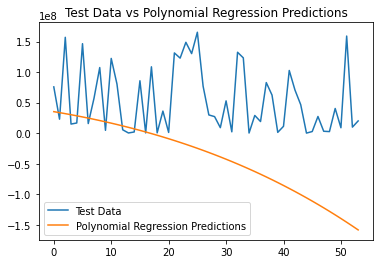

In [77]:
# Plotting test data vs polynomila regression prediction
plt.plot(y_test)
plt.plot(test_classifier_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.title('Test Data vs Polynomial Regression Predictions')

### SVM Algorithm

In [78]:
# calculating daily increase
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 
# calculating moving increase

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# calculating confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# calculating deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# calculating recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# calculating active 
world_active_avg = moving_average(total_active, window)

In [79]:
# changing list into array
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [80]:
# calculating future forcasting
days_in_future = 10
future_forcasting = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcasting[:-10]

In [81]:
# Converting integer into datetime for better doing visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcasting_dates = []
for i in range(len(future_forcasting)):
    future_forcasting_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [82]:
# spliting data into train and test
x_train, x_test, y_train, y_test = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.12, shuffle=False)

In [83]:
# Building SVR model
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(x_train, y_train)
svm_pred = svm_confirmed.predict(future_forcasting)
svm_test_pred = svm_confirmed.predict(x_test)
# here i am calculating MAE and MSE
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:',mean_squared_error(svm_test_pred, y_test))

MAE: 41408856.9200364
MSE: 1773763433771295.5


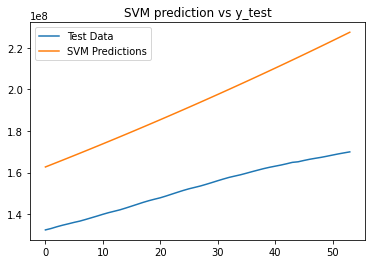

In [84]:
# Plotting prediction vs y_test graph
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.title("SVM prediction vs y_test")
plt.legend(['Test Data', 'SVM Predictions'])

### XGBoost

In [85]:
import xgboost as xgb

In [86]:
X = days_since_1_22[50:]
y = world_cases[50:]

In [87]:
#converting dataset into omtimized datastructure Dmatrix that XGBoost supports
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=123)

In [89]:
#using XGBClassifier for classification problem
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [90]:
#Fit the regressor to the training set and make predictions on the test set
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:39:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
#Computing rmse by invoking mean squared error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 26529723.245876


##### K-Fold Validation using XGBoost

In [92]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[18:39:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[18:39:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,7.140994e+07,590216.461025,7.135882e+07,1.116200e+06
1,6.452601e+07,532639.894098,6.453780e+07,9.744079e+05
2,5.830291e+07,470714.342965,5.825490e+07,8.375320e+05
3,5.268089e+07,428384.417974,5.261926e+07,7.219717e+05
4,4.760688e+07,384319.001374,4.755613e+07,6.196540e+05


In [94]:
#Extracting final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

49    698065.35102
Name: test-rmse-mean, dtype: float64


##### Visualizing Boosting trees and Feature Importance

In [95]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:39:58] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


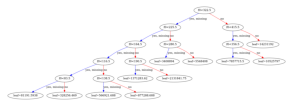

In [101]:
#Plotting the tree
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

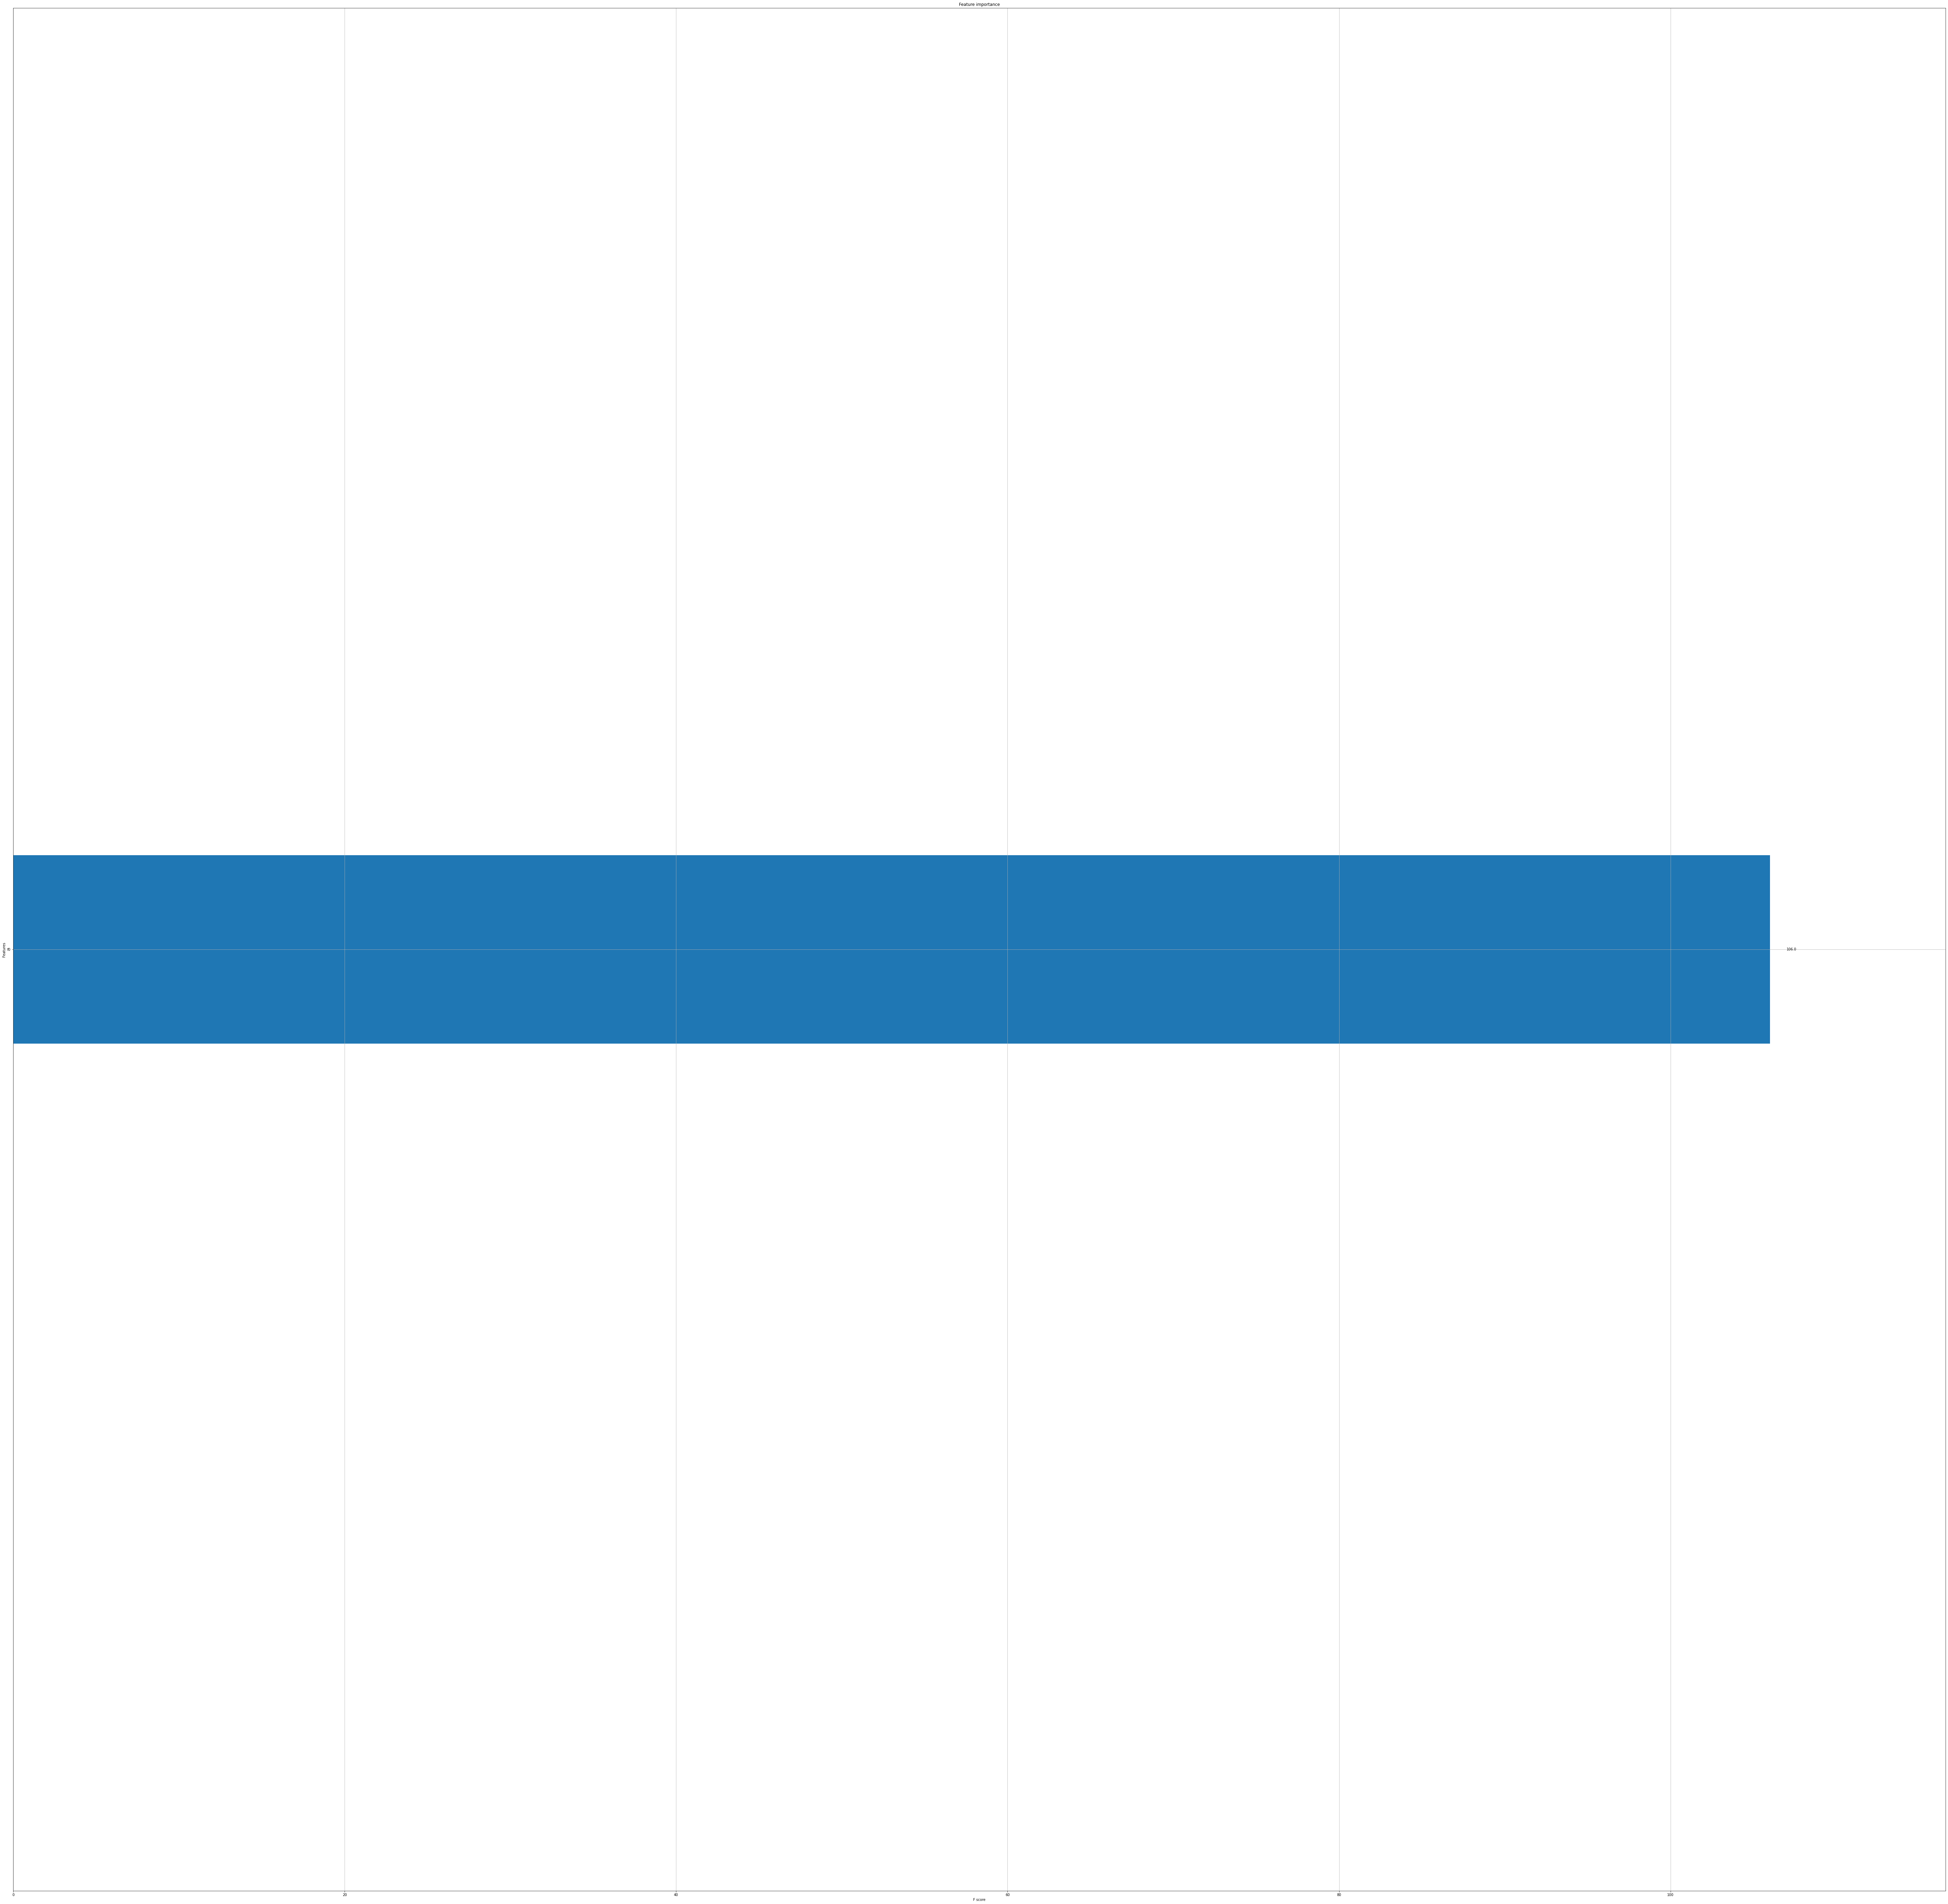

In [102]:
#number of time each feature is split
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()